In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import ngrams
import mcmc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
file_path = os.path.join(os.getcwd(), '..', 'data', 'pg2554.txt')

df_char_1 = ngrams.load_ngrams(file_path, 'char', 1)
df_char_2 = ngrams.load_ngrams(file_path, 'char', 2)

df_word_1 = ngrams.load_ngrams(file_path, 'word', 1)
df_word_2 = ngrams.load_ngrams(file_path, 'word', 2)

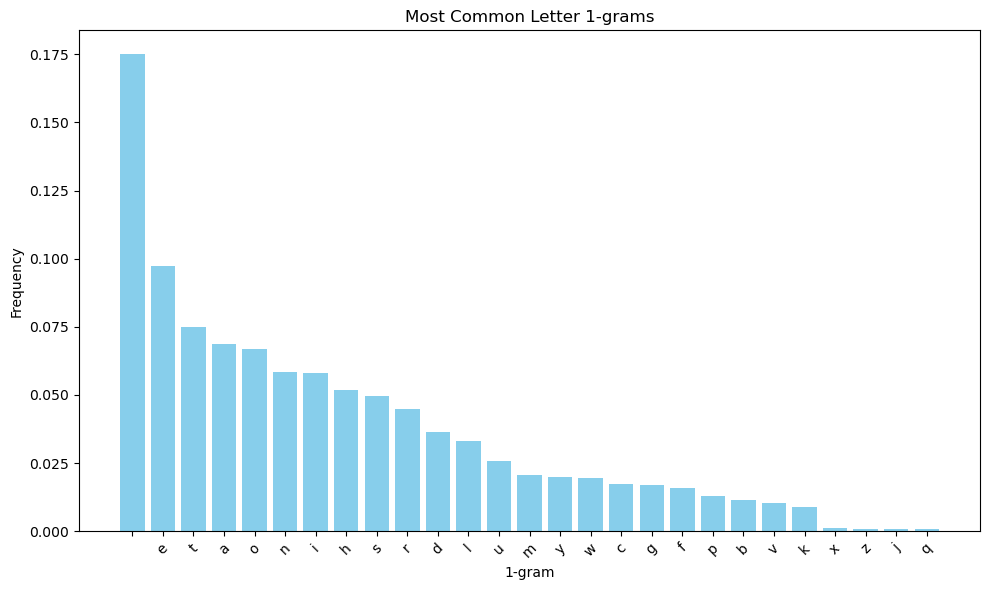

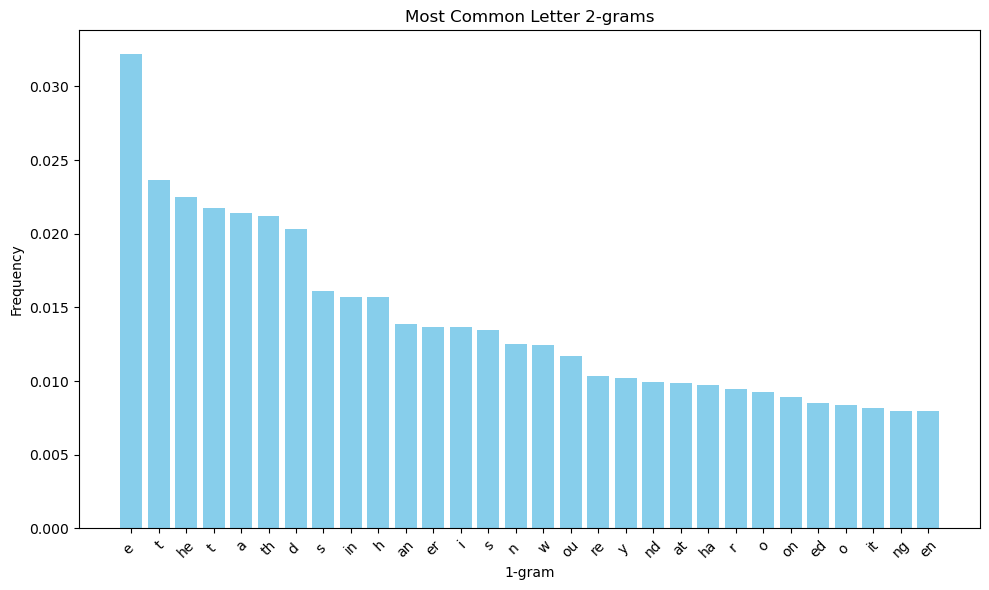

In [12]:
df_char_1_top = df_char_1.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_1_top['1-gram'], df_char_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_char_2_top = df_char_2.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_2_top['2-gram'], df_char_2_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

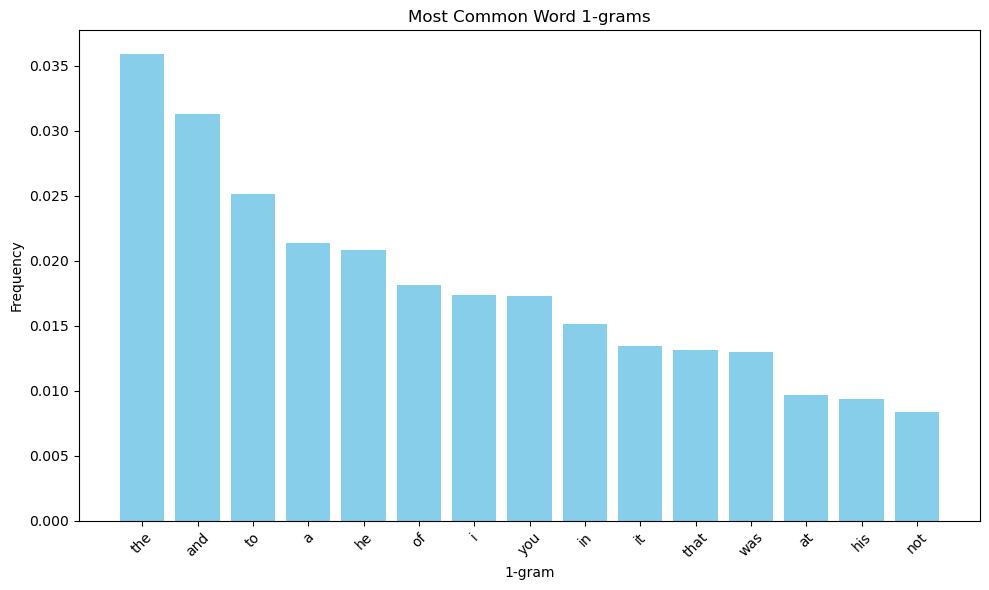

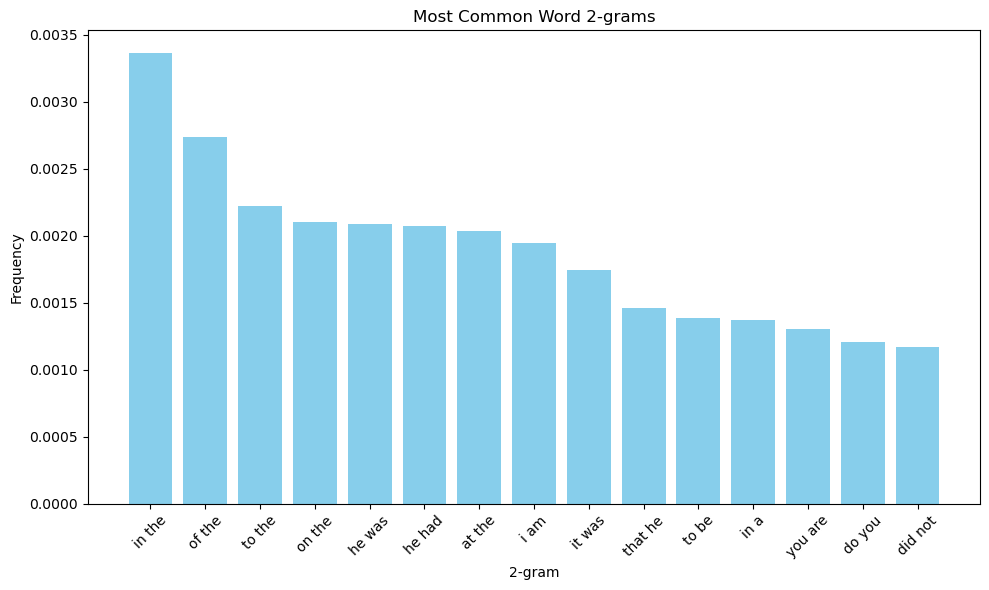

In [13]:
df_word_1_top = df_word_1.head(15).copy()
df_word_1_top.loc[:, '1-gram'] = df_word_1_top['1-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_1_top['1-gram'], df_word_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_word_2_top = df_word_2.head(15).copy()
df_word_2_top.loc[:, '2-gram'] = df_word_2_top['2-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_2_top['2-gram'], df_word_2_top['frequency'], color='skyblue')
plt.xlabel("2-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df_char_3 = ngrams.load_ngrams(file_path, 'char', 5)
text1 = ngrams.generate_text(df_char_3, 'char', 5, 100)
print(text1)

df_word_3 = ngrams.load_ngrams(file_path, 'word', 3)
text2 = ngrams.generate_text(df_word_3, 'word', 3, 30)
print(text2)

100%|██████████| 95/95 [00:02<00:00, 40.67it/s]


ponraskolnikov what held on with a dressing his eyes yes your quite looking regardevel i will wall i


100%|██████████| 27/27 [00:01<00:00, 22.76it/s]

if id simply killed because i talked to him with herwondering childish eyesaah he signed towards her withsurprise and curiosity at raskolnikov frowning and her scrutiny lasted along time he


In [20]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

alphabet = list("abcdefghijklmnopqrstuvwxyz ")
permutation = alphabet.copy()
random.shuffle(permutation)

sigma = {k: v for k, v in zip(alphabet, permutation)}

text = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

alphabet = set(alphabet)
text = text.lower()
text = "".join(a for a in text if a in alphabet)

scrambled_text = "".join([sigma.get(symbol, symbol) for symbol in text])

state_chain, energy_chain, best_perm, best_energy = mcmc.metropolis_hastings(scrambled_text, P, Q, beta=0.5, n=10**6, perm=None, return_chain=True)

best_perm = mcmc.inv_perm(best_perm)
decoded_text = "".join([best_perm.get(symbol, symbol) for symbol in scrambled_text])

print(f"Scrambled text: \n{scrambled_text}\n")
print(f"Best energy: \n{best_energy}\n")
print(f"Decoded text: \n{decoded_text}")

100%|██████████| 1010000/1010000 [00:24<00:00, 41184.88it/s]

Scrambled text: 
rbqplgqbzvqkvgbqesqbrcvgqrbqplgqbzvqpeugbqesqbrcvgqrbqplgqbzvql vqesqprgoecqrbqplgqbzvql vqesqseexrgznvggqrbqplgqbzvqvmedzqesqkvxrvsqrbqplgqbzvqvmedzqesqrnduvoixrbtqrbqplgqbzvqgvlgenqesqxr zbqrbqplgqbzvqgvlgenqesqoluwnvggqrbqplgqbzvqgmurn qesqzemvqrbqplgqbzvqprnbvuqesqovgmlruqpvqzloqvhvutbzrn qkvseuvqigqpvqzloqnebzrn qkvseuvqigqpvqpvuvqlxxq ern qoruvdbqbeqzvlhvnqpvqpvuvqlxxq ern qoruvdbqbzvqebzvuqpltrnqgzeubqbzvqmvureoqplgqgeqsluqxrwvqbzvqmuvgvnbqmvureoqbzlbqgecvqesqrbgqnergrvgbqlibzeurbrvgqrngrgbvoqenqrbgqkvrn quvdvrhvoqseuq eeoqeuqseuqvhrxqrnqbzvqgimvuxlbrhvqov uvvqesqdecmlurgenqenxt

Best energy: 
2969.913412300586

Decoded text: 
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all

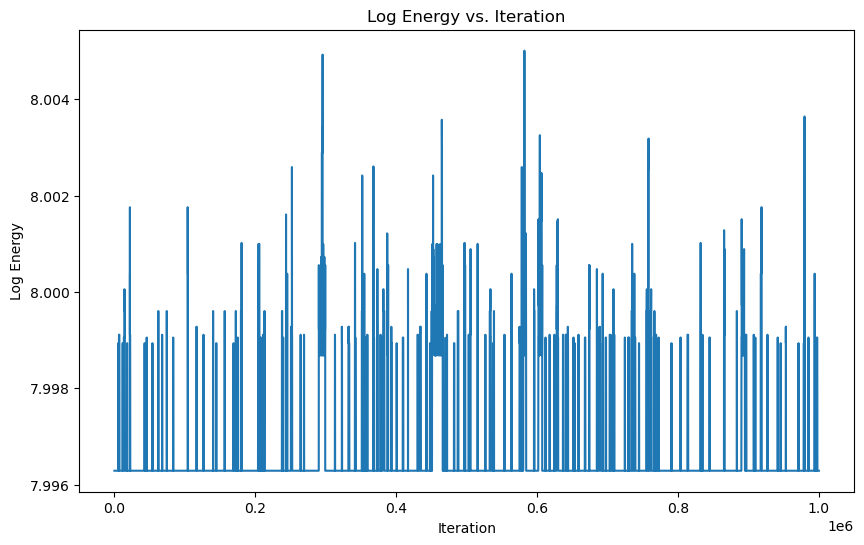

In [21]:
energy_chain = np.array(energy_chain)
energy_chain = np.log(energy_chain)

plt.figure(figsize=(10, 6))
plt.plot(energy_chain)
plt.xlabel("Iteration")
plt.ylabel("Log Energy")
plt.title("Log Energy vs. Iteration")
plt.show()

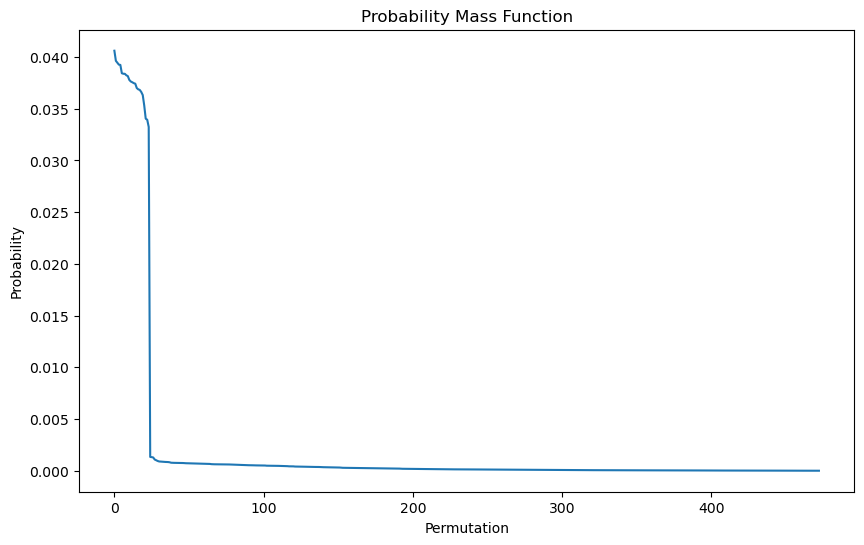

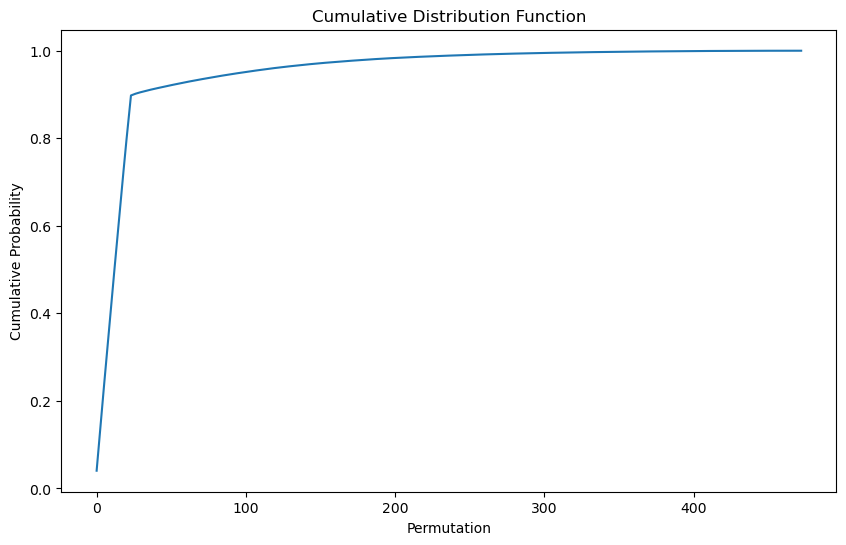

In [22]:
pmf = []
cdf = []

count = Counter([tuple(perm.items()) for perm in state_chain])
count = count.most_common(len(count))

for _, cnt in count:
    pmf.append(cnt / len(state_chain))
    cdf.append(sum(pmf))

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), pmf)
plt.xlabel("Permutation")
plt.ylabel("Probability")
plt.title("Probability Mass Function")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), cdf)
plt.xlabel("Permutation")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")
plt.show()